In [1]:
import fiona
import pandas as pd
import os
from collections import OrderedDict

In [2]:
path = r'C:\Users\Georgios.Voulgaris\PycharmProjects\GeoMap\data'

In [3]:
# Open a total coliform table
SFIGlobalCementDatabase = pd.read_excel(os.path.join(path, 'SFI-Global-Cement-Database-July-2021.xlsx'))
SFIGlobalCementDatabase.head()

,uid,city,state,country,iso3,country_code,region,sub_region,latitude,longitude,...,parent_holding_status,parent_ticker,parent_exchange,parent_permid_2,parent_name_2,ownership_stake_2,parent_lei_2,parent_holding_status_2,parent_ticker_2,parent_exchange_2
0,GACTAFG0001,Pol-e Khomri,Baghlan,Afghanistan,AFG,4.0,Asia,Southern Asia,35.965800,68.686338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GACTAFG0002,Injil,Herat,Afghanistan,AFG,4.0,Asia,Southern Asia,34.322144,61.953503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GACTAGO0001,Luanda,Luanda,Angola,AGO,24.0,Africa,Sub-Saharan Africa,-8.766173,13.316051,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GACTAGO0002,Cacuaco,Luanda,Angola,AGO,24.0,Africa,Sub-Saharan Africa,-8.796392,13.426780,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GACTAGO0003,Lobito,Benguela,Angola,AGO,24.0,Africa,Sub-Saharan Africa,-12.342644,13.581766,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
SFIGlobalCementDatabase.dtypes

uid                         object
city                        object
state                       object
country                     object
iso3                        object
country_code               float64
region                      object
sub_region                  object
latitude                   float64
longitude                  float64
accuracy                    object
status                      object
plant_type                  object
production_type             object
capacity                   float64
capacity_source             object
year                       float64
owner_permid               float64
owner_name                  object
owner_source                object
parent_permid              float64
parent_name                 object
ownership_stake            float64
parent_lei                  object
parent_holding_status       object
parent_ticker               object
parent_exchange             object
parent_permid_2            float64
parent_name_2       

In [5]:
# Exporting resulting data as geopackage

# Create schema and define crs
schema = {'properties': OrderedDict([('uid', 'str'), ('city', 'str'), ('state', 'str'), ('country', 'str')]),
          'geometry': 'Point'}
crs = {'init': 'epsg: 4326'}

In [6]:
# Open output shapefile
cementShp = fiona.open('SFIGlobalCementDatabase.shp',mode='w',schema=schema,driver='ESRI Shapefile',crs=crs)

In [7]:
for index, line in SFIGlobalCementDatabase.iterrows():
    feature = {
    'geometry':{'type':'Point','coordinates':(line.longitude,line.latitude)},
    'properties':OrderedDict([('uid',line['uid']), ('city', line['city']), ('state', line['state']), ('country', line['country'])])
    }
    cementShp.write(feature)
cementShp.close()

In [8]:
import geopandas as gpd
china = gpd.read_file("SFIGlobalCementDatabase.shp")
china.head()

,uid,city,state,country,geometry
0,GACTAFG0001,Pol-e Khomri,Baghlan,Afghanistan,POINT (68.68634 35.96580)
1,GACTAFG0002,Injil,Herat,Afghanistan,POINT (61.95350 34.32214)
2,GACTAGO0001,Luanda,Luanda,Angola,POINT (13.31605 -8.76617)
3,GACTAGO0002,Cacuaco,Luanda,Angola,POINT (13.42678 -8.79639)
4,GACTAGO0003,Lobito,Benguela,Angola,POINT (13.58177 -12.34264)


In [9]:
#Convert crs to UTM
geo_df_UTM = china.to_crs(epsg = 3395)
geo_df_UTM.head()

,uid,city,state,country,geometry
0,GACTAFG0001,Pol-e Khomri,Baghlan,Afghanistan,POINT (7646128.171 4270820.758)
1,GACTAFG0002,Injil,Herat,Afghanistan,POINT (6896632.407 4048048.571)
2,GACTAGO0001,Luanda,Luanda,Angola,POINT (1482336.017 -973167.976)
3,GACTAGO0002,Cacuaco,Luanda,Angola,POINT (1494662.313 -976549.580)
4,GACTAGO0003,Lobito,Benguela,Angola,POINT (1511915.275 -1375600.659)


In [10]:
china.head()

,uid,city,state,country,geometry
0,GACTAFG0001,Pol-e Khomri,Baghlan,Afghanistan,POINT (68.68634 35.96580)
1,GACTAFG0002,Injil,Herat,Afghanistan,POINT (61.95350 34.32214)
2,GACTAGO0001,Luanda,Luanda,Angola,POINT (13.31605 -8.76617)
3,GACTAGO0002,Cacuaco,Luanda,Angola,POINT (13.42678 -8.79639)
4,GACTAGO0003,Lobito,Benguela,Angola,POINT (13.58177 -12.34264)


In [11]:
china.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

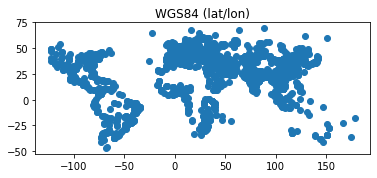

In [12]:
ax = china.plot()
ax.set_title("WGS84 (lat/lon)");

In [13]:
china = china.to_crs("EPSG:3395")

Text(0.5, 1.0, 'Mercator')

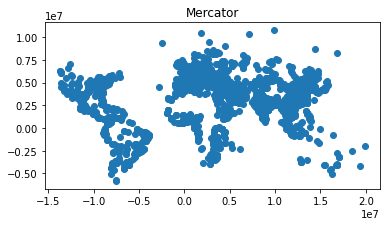

In [14]:
ax = china.plot()
ax.set_title('Mercator')

In [15]:
china.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
outpath = r'C:\Users\Georgios.Voulgaris\PycharmProjects\GeoMap\data'

In [17]:
china.to_file(os.path.join(outpath,'china.geojson'), driver='GeoJSON')

C:\Users\Georgios.Voulgaris\Anaconda3\envs\GeoEnv\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
